# Data Processing
We used a data set that contains images, each image is a representation of a planning task, 
and a table with total run time for a collection of planners on these tasks. 
Firstly, we simplify the table to indicate which planners are considered preferable to use on each planning task.
Secondly, we 

## Data-Frame Processing   
Import the necessary packages.

In [131]:
import os
import pandas as pd
from utils import *

Load data frame.

In [132]:
CURRENT_DIR = os.getcwd()
DATA_DIR = os.path.expanduser(CURRENT_DIR + '/IPC-image-data/lifted')
df = pd.read_csv(CURRENT_DIR + '/IPC-image-data/runtimes.csv')

Let's take a look at the data:

In [133]:
df.head(5)

,filename,h2-simpless-dks-celmcut,h2-simpless-dks-cpdbshc900,h2-simpless-dks-900masb50ksccdfp,h2-simpless-oss-900masb50ksbmiasm,h2-simpless-dks-blind,h2-simpless-oss-zopdbsgenetic,h2-simpless-oss-blind,h2-simpless-dks-900masb50ksbmiasm,seq-opt-symba-1,...,DecStar,FDMS1,FDMS2,Metis1,Metis2,Planning_PDBs,Scorpion,SymbolicBidirectional,Symple_1,Symple_2
0,agricola-opt18-p01.pddl,10000.0,480.029,84.7561,978.635,105.0550,94.7066,94.4991,87.5693,6.58,...,10000.0,90.123,109.198,10000.0,10000.0,56.453,10000.000,21.796,1743.946,1730.012
1,agricola-opt18-p02.pddl,10000.0,478.332,72.9656,969.578,44.7857,42.1715,42.8049,532.0520,17.39,...,10000.0,85.876,293.176,10000.0,10000.0,245.053,1088.101,78.054,10000.000,10000.000
2,agricola-opt18-p03.pddl,10000.0,269.491,100.8550,928.244,39.3269,31.5789,31.5499,329.1270,56.72,...,10000.0,112.842,405.213,10000.0,10000.0,10000.000,941.246,87.209,10000.000,10000.000
3,agricola-opt18-p04.pddl,10000.0,434.582,339.6020,971.922,10000.0000,494.1100,537.8430,284.4790,14.70,...,10000.0,355.097,157.460,10000.0,10000.0,139.942,10000.000,52.346,10000.000,10000.000
4,agricola-opt18-p05.pddl,10000.0,594.021,188.3360,993.565,100.2830,97.5810,94.1114,361.9160,69.65,...,10000.0,204.673,395.223,10000.0,10000.0,991.816,10000.000,52.934,10000.000,10000.000


Each row contains statistics about a certain planning problem: 
its name and the time it took for each planner to solve it
 
The list of planners is:   

In [134]:
list(df.columns[1:])

['h2-simpless-dks-celmcut',
 'h2-simpless-dks-cpdbshc900',
 'h2-simpless-dks-900masb50ksccdfp',
 'h2-simpless-oss-900masb50ksbmiasm',
 'h2-simpless-dks-blind',
 'h2-simpless-oss-zopdbsgenetic',
 'h2-simpless-oss-blind',
 'h2-simpless-dks-900masb50ksbmiasm',
 'seq-opt-symba-1',
 'h2-simpless-oss-masginfsccdfp',
 'h2-simpless-dks-900masginfsccdfp',
 'h2-simpless-oss-cpdbshc900',
 'h2-simpless-dks-zopdbsgenetic',
 'simpless-oss-masb50kmiasmdfp',
 'h2-simpless-oss-900masb50ksccdfp',
 'simpless-dks-masb50kmiasmdfp',
 'h2-simpless-oss-celmcut',
 'Complementary1',
 'Complementary2',
 'DecStar',
 'FDMS1',
 'FDMS2',
 'Metis1',
 'Metis2',
 'Planning_PDBs',
 'Scorpion',
 'SymbolicBidirectional',
 'Symple_1',
 'Symple_2']

We aim to establish a net that will classify each planning problem to its preferable planner.
For training purposes we create a new abstracted data-frame.
In the new data-frame we mark 1 where the planner is preferable (top 25%), else we mark 0.

Creation of a new data-frame:

In [135]:
temp_df = df.drop('filename', axis=1)


For each planning problem we establish a threshold that will help us decide which planner is preferable.
A planner is preferable if it did not reach timeout and it is faster than 75% of the other planners.

In [136]:
threshold = temp_df.apply(lambda x: np.percentile(x,25), axis=1)
threshold[threshold==10000] = temp_df.apply(lambda x: np.percentile(x,20), axis=1)[threshold==10000]
threshold[threshold==10000] = temp_df.apply(lambda x: np.percentile(x,15), axis=1)[threshold==10000]
threshold[threshold==10000] = temp_df.apply(lambda x: np.percentile(x,10), axis=1)[threshold==10000]
threshold[threshold==10000] = temp_df.apply(lambda x: np.percentile(x,5), axis=1)[threshold==10000]
threshold[threshold==10000] = temp_df.apply(lambda x: np.percentile(x,1), axis=1)[threshold==10000]
# list(threshold)

Add the threshold to the a new column in the data-frame. 

In [137]:
df['threshold'] = threshold

In [138]:
columns = list(df.columns)
columns.remove('filename')

for col in columns:
    cond = (df[col] < df['threshold']) & (df[col] != -1)
    df.loc[cond, col] = 1

df.head()

,filename,h2-simpless-dks-celmcut,h2-simpless-dks-cpdbshc900,h2-simpless-dks-900masb50ksccdfp,h2-simpless-oss-900masb50ksbmiasm,h2-simpless-dks-blind,h2-simpless-oss-zopdbsgenetic,h2-simpless-oss-blind,h2-simpless-dks-900masb50ksbmiasm,seq-opt-symba-1,...,FDMS1,FDMS2,Metis1,Metis2,Planning_PDBs,Scorpion,SymbolicBidirectional,Symple_1,Symple_2,threshold
0,agricola-opt18-p01.pddl,10000.0,480.029,1.0000,978.635,105.055,94.7066,94.4991,1.000,1.0,...,1.000,109.198,10000.0,10000.0,1.000,10000.000,1.000,1743.946,1730.012,94.4991
1,agricola-opt18-p02.pddl,10000.0,478.332,72.9656,969.578,1.000,1.0000,1.0000,532.052,1.0,...,85.876,293.176,10000.0,10000.0,245.053,1088.101,78.054,10000.000,10000.000,72.9656
2,agricola-opt18-p03.pddl,10000.0,269.491,100.8550,928.244,1.000,1.0000,1.0000,329.127,1.0,...,112.842,405.213,10000.0,10000.0,10000.000,941.246,87.209,10000.000,10000.000,87.2090
3,agricola-opt18-p04.pddl,10000.0,434.582,339.6020,971.922,10000.000,494.1100,537.8430,1.000,1.0,...,355.097,1.000,10000.0,10000.0,1.000,10000.000,1.000,10000.000,10000.000,339.6020
4,agricola-opt18-p05.pddl,10000.0,594.021,188.3360,993.565,1.000,1.0000,1.0000,361.916,1.0,...,204.673,395.223,10000.0,10000.0,991.816,10000.000,1.000,10000.000,10000.000,160.4630


In [139]:
df.replace(10000, 0, inplace=True)
df.head()

,filename,h2-simpless-dks-celmcut,h2-simpless-dks-cpdbshc900,h2-simpless-dks-900masb50ksccdfp,h2-simpless-oss-900masb50ksbmiasm,h2-simpless-dks-blind,h2-simpless-oss-zopdbsgenetic,h2-simpless-oss-blind,h2-simpless-dks-900masb50ksbmiasm,seq-opt-symba-1,...,FDMS1,FDMS2,Metis1,Metis2,Planning_PDBs,Scorpion,SymbolicBidirectional,Symple_1,Symple_2,threshold
0,agricola-opt18-p01.pddl,0.0,480.029,1.0000,978.635,105.055,94.7066,94.4991,1.000,1.0,...,1.000,109.198,0.0,0.0,1.000,0.000,1.000,1743.946,1730.012,94.4991
1,agricola-opt18-p02.pddl,0.0,478.332,72.9656,969.578,1.000,1.0000,1.0000,532.052,1.0,...,85.876,293.176,0.0,0.0,245.053,1088.101,78.054,0.000,0.000,72.9656
2,agricola-opt18-p03.pddl,0.0,269.491,100.8550,928.244,1.000,1.0000,1.0000,329.127,1.0,...,112.842,405.213,0.0,0.0,0.000,941.246,87.209,0.000,0.000,87.2090
3,agricola-opt18-p04.pddl,0.0,434.582,339.6020,971.922,0.000,494.1100,537.8430,1.000,1.0,...,355.097,1.000,0.0,0.0,1.000,0.000,1.000,0.000,0.000,339.6020
4,agricola-opt18-p05.pddl,0.0,594.021,188.3360,993.565,1.000,1.0000,1.0000,361.916,1.0,...,204.673,395.223,0.0,0.0,991.816,0.000,1.000,0.000,0.000,160.4630


In [140]:
for col in columns:
    cond = (df[col] != 1) & (df[col] != -1)
    df.loc[cond, col] = 0
df.head()

,filename,h2-simpless-dks-celmcut,h2-simpless-dks-cpdbshc900,h2-simpless-dks-900masb50ksccdfp,h2-simpless-oss-900masb50ksbmiasm,h2-simpless-dks-blind,h2-simpless-oss-zopdbsgenetic,h2-simpless-oss-blind,h2-simpless-dks-900masb50ksbmiasm,seq-opt-symba-1,...,FDMS1,FDMS2,Metis1,Metis2,Planning_PDBs,Scorpion,SymbolicBidirectional,Symple_1,Symple_2,threshold
0,agricola-opt18-p01.pddl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,agricola-opt18-p02.pddl,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,agricola-opt18-p03.pddl,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,agricola-opt18-p04.pddl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,agricola-opt18-p05.pddl,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [141]:
df.drop('threshold', axis=1, inplace=True)

df.head()

,filename,h2-simpless-dks-celmcut,h2-simpless-dks-cpdbshc900,h2-simpless-dks-900masb50ksccdfp,h2-simpless-oss-900masb50ksbmiasm,h2-simpless-dks-blind,h2-simpless-oss-zopdbsgenetic,h2-simpless-oss-blind,h2-simpless-dks-900masb50ksbmiasm,seq-opt-symba-1,...,DecStar,FDMS1,FDMS2,Metis1,Metis2,Planning_PDBs,Scorpion,SymbolicBidirectional,Symple_1,Symple_2
0,agricola-opt18-p01.pddl,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,agricola-opt18-p02.pddl,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,agricola-opt18-p03.pddl,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,agricola-opt18-p04.pddl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,agricola-opt18-p05.pddl,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Image Processing
We use standard python packages to load image data into a numpy array. 
Then we convert this array into a torch.Tensor.

In [142]:
import os
import numpy as np
# import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
# import matplotlib.pyplot as plt
# from skimage import io, transform, util
# from scipy.fftpack import fft2
# from sklearn.preprocessing import RobustScaler, MinMaxScaler
from pp_dataset import PlannerPortfolioDataset
from architectures import PlaNet
import argparse
import logging
import time
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Get path information:

In [143]:
CURRENT_DIR = os.getcwd()
processed_df_path = os.path.join(CURRENT_DIR, 'df.csv')
image_folder_path = os.path.join(CURRENT_DIR, 'IPC-image-data/lifted/')

Initiate the dataset:


In [144]:
plan_dataset = PlannerPortfolioDataset(processed_df_path, image_folder_path, ftransform=1)

Check out a gray-scale image: 

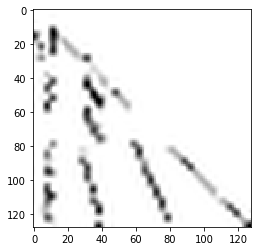

In [155]:
image = plan_dataset.get_image(150)
plt.figure()
plt.imshow(image, cmap="gray")
plt.show()

Check out a Fourier-Transformed image: 

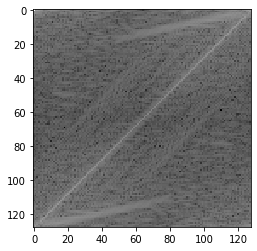

In [157]:
image = plan_dataset.get_ft_image(150)
plt.figure()
plt.imshow(20*np.log10(abs(image)), cmap='gray')
plt.show()

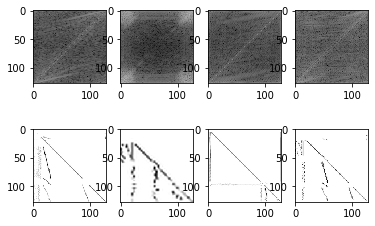

In [163]:
fig = plt.figure()
l = [0,120,200]

for i,idx in enumerate(l):
    plt.subplot(2,len(l),i+1)
    image = plan_dataset.get_ft_image(idx)
    plt.imshow(20*np.log10(abs(image)), cmap='gray')

for i,idx in enumerate(l):
    plt.subplot(2,len(l),i+len(l)+1)
    image = plan_dataset.get_image(idx)
    plt.imshow(image, cmap='gray')


plt.show()


